In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from numba import njit
import scipy.linalg

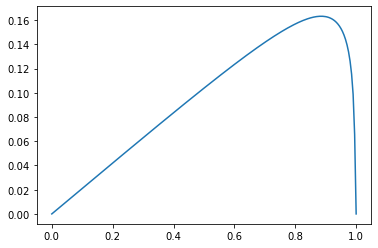

In [57]:
Nt = 10000000
Nh = 200

@njit
def getSolution(t):
    global Nt, Nh
    tau = t/Nt
    ksi = np.linspace(0, 1, Nh+1).astype("float64")
    h = ksi[1] - ksi[0]
    omega = np.sqrt(1-ksi)
    gamma = 0.1
    v = omega[-2]**2*omega[-3]/gamma/2/h
    gammaArr = np.zeros(Nt)
    for k in range(Nt):
        omega[1:Nh] = omega[1:Nh] + tau*((1/gamma*v*ksi[1:Nh])*(omega[2:Nh+1] - omega[1:Nh])/h - 
                                        1/gamma/h * ( -(omega[2:Nh+1] + omega[1:Nh])**3/8/gamma * ((omega[2:Nh+1] - omega[1:Nh])/h) + 
                                                    (omega[0:Nh-1] + omega[1:Nh])**3/8/gamma * ((omega[1:Nh] - omega[0:Nh-1])/h)))
        v = -(omega[Nh-1])**2/gamma*((omega[Nh] - omega[Nh-2])/2/h)
        gamma = gamma + tau*v
        gammaArr[k] = gamma
    return ksi, omega, gammaArr
    
ksi, omega, gammaArr = getSolution(1.)
plt.plot(ksi, np.abs(np.sqrt(1-ksi) - omega))
# plt.plot(ksi, omega)
plt.show()

0.8644600295638253


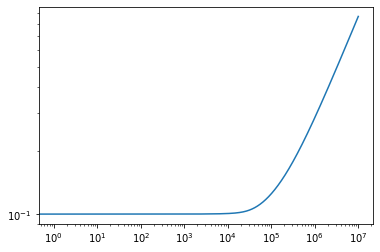

In [58]:
print(gammaArr[-1])
plt.plot(gammaArr)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [39]:
print(omega)

[ 0. nan nan ... nan nan  1.]


8.531107635751914
13.180353104133923


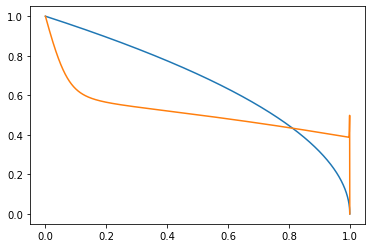

In [3]:
Nt = 5000000
Nh = 2000

# @njit
def getSolution(t):
    global Nt, Nh
    tau = t/Nt
    ksi = np.linspace(0, 1, Nh+1).astype("float64")
    h = ksi[1] - ksi[0]
    omega = np.sqrt(1-ksi)
    gamma = 5
    v = 0.0
    for k in range(Nt):
        A = np.array([np.append([0], tau*v/2/h/gamma * ksi[2:Nh]),
                     np.ones(Nh-1),
                     np.append(-tau*v/2/h/gamma * ksi[1:Nh-1], [0])])
        b = omega[1:Nh] + tau*(-1/gamma/h * ( -(omega[2:Nh+1] + omega[1:Nh])**3/8/gamma * ((omega[2:Nh+1] - omega[1:Nh])/h) + 
                                                    (omega[0:Nh-1] + omega[1:Nh])**3/8/gamma * ((omega[1:Nh] - omega[0:Nh-1])/h)))
        b[0] -= tau*v*ksi[1]/2/h/gamma
        omega = np.append(np.append([1.], scipy.linalg.solve_banded((1, 1), A, b)), [0.])
        v = -(omega[Nh-1])**2/gamma*((omega[Nh] - omega[Nh-2])/2/h)
        gamma = gamma + tau*v
    print(gamma)
    print(v)
    return ksi, omega
    
ksi, omega = getSolution(1.)
plt.plot(ksi, np.sqrt(1-ksi))
plt.plot(ksi, omega)
plt.show()